### Instituto Tecnológico de Costa Rica (ITCR)
### Escuela de Computación
### Curso: Inteligencia Artificial
 
### Segunda tarea programada 2022-I


Estudiantes: Juan Ignacio Navarro Navarro

## Pregunta 1. Graficación

---

Para las siguientes:

Función 1:

$f_{1}\left(x_{1},x_{2}\right)=\left(x_{1}-0.7\right)^{2}+\left(x_{2}-0.5\right)^{2}$


Función 2: 

$f_{2}\left(x_{1},x_{2}\right)=x_{1}e^{\left(-x_{1}^{2}-x_{2}^{2}\right)}$


Realice lo siguiente (5 puntos):

En Python, cree una función que le permita graficar las funciones anteriores. Utilizando la función en Python genere dos gráficos, uno para cada función $𝑓_{1}$ y  $𝑓_{2}$. 

C:\Users\juan navarro\AppData\Local\Temp\ipykernel_7044\3083580836.py:31: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


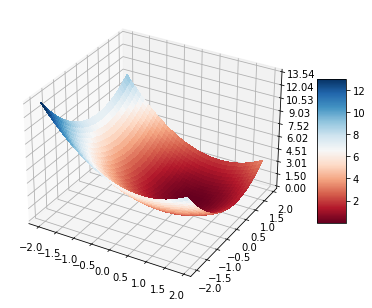

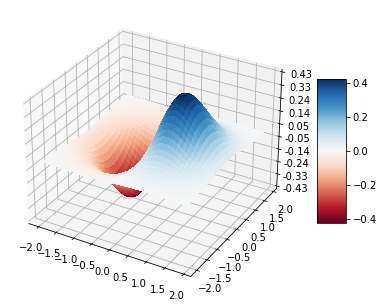

In [1]:

from numpy import exp,arange
from pylab import meshgrid,cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt

#Se define la funcion que se va a graficar

def func_1(x1,x2):
    """
    Este método define el resultado de la función 1
    del enunciado dados dos valores x1 y x2
    """
    return (x1 - 0.7)**2 + (x2 - 0.5)**2


def func_2(x1, x2):
    """
    Este método define el resultado de la función 2
    del enunciado dados dos valores x1 y x2
    """
    return x1 * exp(-x1**2 - x2**2)

def grafica3D(X,Y,Z):
    """
    Esta fución realiza la gráfica una función con dos variables
    independientes X, Y y una dependiente Z
    """
    fig = plt.figure()
    ax = Axes3D(fig)

    surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.RdBu,linewidth=0, antialiased=False)

    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    fig.colorbar(surf, shrink=0.5, aspect=5)

    plt.show()


# Definición del rango de valores a graficar
x = arange(-2.0,2.0,0.1)
y = arange(-2.0,2.0,0.1)

#Se define la grilla de puntos para x y y
X,Y = meshgrid(x, y)

# Se evalua la primera funcion 1 segun los valores de X y Y
Z = func_1(X, Y)

# Se gafica la primera función 1
grafica3D(X,Y,Z)

# Se evalua la segunda funcion 2 con los valores de X y Y 
Z = func_2(X, Y)

# Se grafica la primera funcion 2
grafica3D(X, Y, Z)

## Pregunta 2. Optimización
---

**a) Vector gradiente  (5 puntos)**

Calcule el vector gradiente $\nabla f$ para la siguiente función multi-variable $f: \mathbb{R}^2\rightarrow\mathbb{R}$. Además, evalúelo en $\begin{bmatrix}1\\1\end{bmatrix}$ y $\begin{bmatrix}-1\\-1\end{bmatrix}$. 

--No se require programación en python--.

 - $f_3(x,y) = x^4+y^3+5x^2y^3$

### Respuesta

El gradiente de la función $f_3$ es:

$$\nabla _{f_3}(x, y) = (4x^3 + 10xy^3, 3y^2+ 15x^2y^2)$$

Al evaluar el vector en $\begin{bmatrix}1\\1\end{bmatrix}$ se obtiene:

$$\nabla _{f_3}(1, 1) = (4 + 10, 3 + 15)$$
$$\nabla _{f_3}(1, 1) = (14, 18)$$

Ahora al evaluarlo en $\begin{bmatrix}-1\\-1\end{bmatrix}$:

$$\nabla _{f_3}(-1, -1) = (-4 + 10, 3 + 15)$$
$$\nabla _{f_3}(-1, -1) = (6, 18)$$


**b) Descenso de gradiente (10 puntos)**

**Sea la función:** 

\begin{equation}
f_4\left(\overrightarrow{x}\right)=(x-0.7)^{2}+(y-0.5)^{2},
\end{equation}


**Implemente el algoritmo de descenso de gradiente para $f_4(x)$ en la función en Python denominada: (8 puntos)**

$$funcion\_gradient\_descent \left(learning\_rate, max\_iters, starting\_point, f\_function,f\_gradient, precision\right)$$

donde los parámetros corresponden a:

* learning_rate: tasa_aprendizaje o el $\alpha$
* max_iters: es el máximo número de iteraciones a ejecutar
* starting_point: es el vector con los dos valores iniciales [x,y]
* f_function: fución a optimizar
* f_gradient: gradiente de la función a optimizar.
* precision: es el valor mínimo para un cambio entre iteración. 

Despliegue y analice los resultados (2 puntos).

In [2]:
def func_4(x, y):
    """
    Codigo de la función 4 definida en el enunciado
    """
    return (x - 0.7)^2 + (y - 0.5)^2

def gfunc_4(x, y):
    """
    Gradiente de la función 4 definida en el enunciado
    """
    return 2*(x - 0.7), 2*(y - 0.5)

def function_gradient_descent(learning_rate, max_iters, starting_point, f_function, f_gradient, precision):
    """
    Esta función calcula el restultado del algoritmo de descenso de gradiente
    """
    current_value = starting_point
    grad_norm = 1
    iters = 0

    # iteracion hasta que la noram del gradiente sea menos a la precision indicada
    while grad_norm > precision and iters < max_iters:
        curr_x = current_value[0]
        curr_y = current_value[1]
        curr_grad = f_gradient(curr_x, curr_y)
        prev_value = current_value
        # calculo del nuevo valor: x = x - k * gradiente( f(x) )
        current_value = prev_value[0] - learning_rate * curr_grad[0] , prev_value[1] - learning_rate * curr_grad[1]
        # actualización de la norma del gradiente
        grad_norm = (curr_grad[0]**2 + curr_grad[1]**2)**0.5
        iters += 1

    return current_value

# definicion de las variables iniciales
learning_rate = 0.01
max_iters = 10000
starting_point = (3, 2)
f_function = func_4
f_gradient = gfunc_4
precision = 0.000001

# como resultado se imprime el valor del descenso de gradiente
print(function_gradient_descent(learning_rate, max_iters, starting_point, f_function, f_gradient, precision))



(0.7000004034652348, 0.5000002631295011)


## Pregunta 3. Análisis de regresión con aprendizaje profundo (con PyTorch)

Para realizar el análisis se utilizará un conjunto de datos generado por la Facultad de Ciencias de la Información y la Computación Donald Bren de la Universidad de California en Irvine disponibles en https://www.kaggle.com/rodolfomendes/abalone-dataset (copia adjunta).   

Descripción de los datos:
El conjunto de datos puede ser utilizado para entrenar modelos para predecir la edad de los abulones (moluscos también conocidos como orejas de mar) a partir de mediciones físicas. Comúnmente, la edad de un abulón se determina cortando la concha a través del cono, tiñéndola y contando el número de anillos a través de un microscópio, una tarea que requiere mucho tiempo. Sin embargo, es posible utilizar datos morfológicos del individuo, que son más fáciles de obtener y permiten predecir la edad este. Una descripción detallada de los datos está disponible en https://archive.ics.uci.edu/ml/datasets/abalone. 

Dado el conjunto de datos de abulones se **desea crear un modelo de regresión utilizando un perceptrón multicapa para predecir la cantidad de anillos (columna Rings) de estos a partir del conjunto de características**.

Realice lo siguiente:

(requisito indispensable para tomar en cuenta el ejercicio, deben usar PyTorch).
- a) (1 punto) Describa el conjunto de datos, cada uno de sus campos y referencie la fuente. 
- b) Cargue el conjunto de datos.
- c) (3 puntos) Explore y limpie el conjunto de datos, visualice algunas estadísticas, presente una matriz de calor y verifique que no existan valores faltantes.
- d) (5 puntos) Defina el modelo utilizando un perceptrón multicapa implementado con PyTorch.
- e) (5 puntos) Realice el entrenamiento del modelo.
- f) (5 puntos) Calcule la pérdida utilizando el error cuadrático medio.
- g) (2 puntos) Prepare un ejemplo de uso del modelo seleccionado y explique el resultado.
- h) (5 puntos) Realice al menos tres conclusiones sobre el ejercicio.

#### a)

Descripción de los datos:

- Lenght: corresponde a la longitud más larga de la concha en milímetros.
- Diameter: al diametro en milimetros perpendicular a la longitud.
- Height: Es la altura en milimetros con carne en la concha.
- Whole: Es el peso total en gramos de todo el abalón.
- Viscera: Es el peso en gramos de la carne.
- Shellweight: Es el peso de la concha en gramos después de ser secada.
- Rings: es un entero que corresponde a la cantidad de anillos. Es 1.5 más en adición a la cantidad de años del abalón.



#### b)
- Carga de los datos


In [3]:
# Bibliotecas requeridas para el ejercicio

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch as torch

import seaborn as sns

In [4]:
# Carga de los datos de los abalones

data = pd.read_csv('datos/Abalone.csv')

print(data)

     Length  Diameter  Height   Whole  Viscera  Shellweight  Rings
0     0.745     0.585   0.215  2.4990   0.4720       0.7000     17
1     0.740     0.600   0.195  1.9740   0.4085       0.7100     16
2     0.735     0.590   0.225  1.7560   0.3405       0.5800     21
3     0.730     0.595   0.230  2.8255   0.4190       0.8970     17
4     0.725     0.560   0.210  2.1410   0.3980       1.0050     18
..      ...       ...     ...     ...      ...          ...    ...
982   0.155     0.105   0.050  0.0175   0.0035       0.0050      4
983   0.150     0.100   0.025  0.0150   0.0040       0.0050      2
984   0.130     0.100   0.030  0.0130   0.0030       0.0040      3
985   0.110     0.090   0.030  0.0080   0.0020       0.0030      3
986   0.075     0.055   0.010  0.0020   0.0005       0.0015      1

[987 rows x 7 columns]


#### c)
- Exploración de los datos y mapa de calor

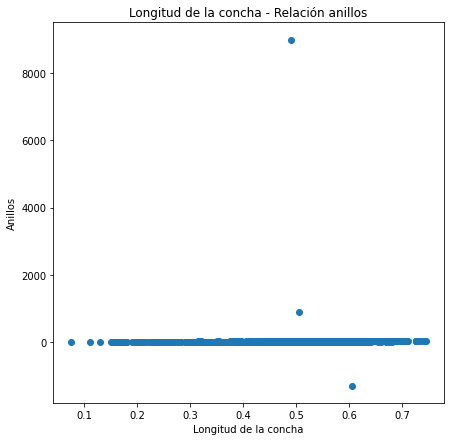

In [6]:
# distribución de los anillos con respecto a la longitud

def plot_data(df, col_x, col_y, label_x, label_y, val_title):
    # Imprime gráfica de dispersión. 
    
    plt.figure(figsize=(7,7))
    plt.scatter(x=df[col_x],y=df[col_y])
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.title(val_title)
    plt.show()
    
plot_data(data,'Length', 'Rings', 'Longitud de la concha','Anillos',
          'Longitud de la concha - Relación anillos')  

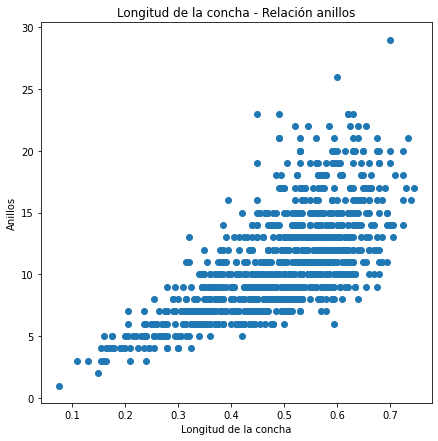

In [8]:
# Note que hay datos que están un poco perdidos por lo que se debe
#  realizar una limpieza en el modelo, esto se hace a continuación

data = data[data.Rings <= 100]
data = data[data.Rings >= -100]

plot_data(data,'Length', 'Rings', 'Longitud de la concha','Anillos',
          'Longitud de la concha - Relación anillos')

# Note que al correr el modelo ahora los datos se ven mejor 
#  sin el ruido

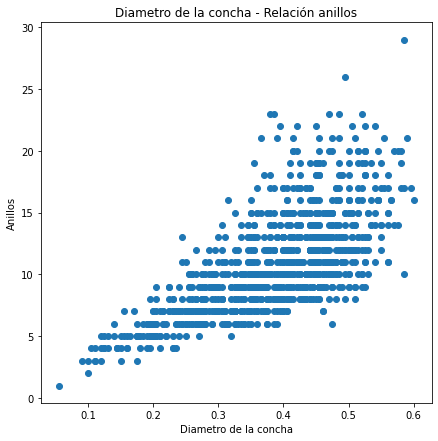

In [11]:
# distribución de los anillos con respecto al diametro
    
plot_data(data,'Diameter', 'Rings', 'Diametro de la concha','Anillos',
          'Diametro de la concha - Relación anillos')

# En este caso no se observan valores perdidos por lo que no hace
# falta la limpieza

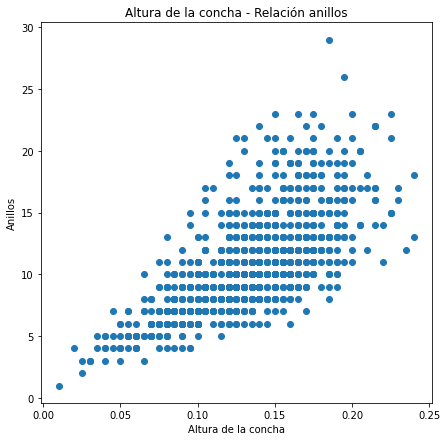

In [12]:
# distribución de los anillos con respecto a la altura
    
plot_data(data,'Height', 'Rings', 'Altura de la concha','Anillos',
          'Altura de la concha - Relación anillos')

# En este caso no se observan valores perdidos por lo que no hace
# falta la limpieza

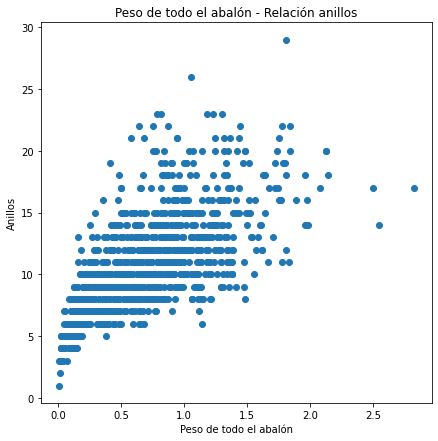

In [13]:
# distribución de los anillos con respecto al peso completo
    
plot_data(data,'Whole', 'Rings', 'Peso de todo el abalón','Anillos',
          'Peso de todo el abalón - Relación anillos')

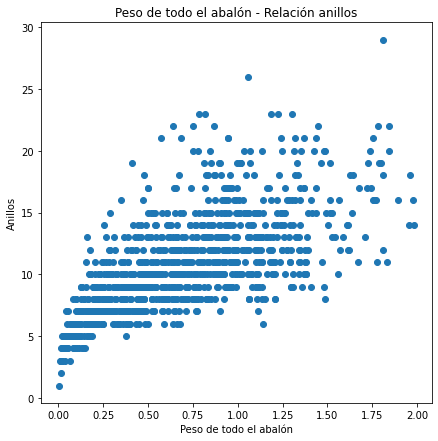

In [14]:
# En este caso se podría hacer una pequeña limpieza para apreciar
# mejor los valores acomulados

data = data[data.Whole <= 2]

plot_data(data,'Whole', 'Rings', 'Peso de todo el abalón','Anillos',
          'Peso de todo el abalón - Relación anillos')

# Note que ahora se ve una mejor distribución

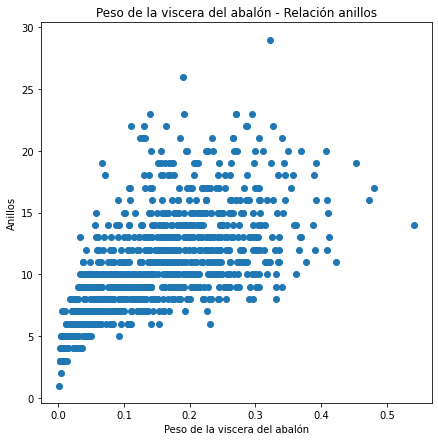

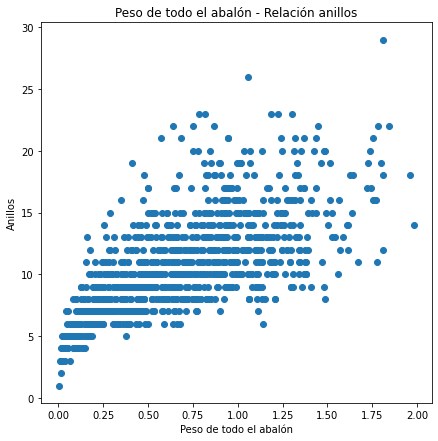

In [16]:
# distribución de los anillos con respecto al peso de la viscera
# del abalón
    
plot_data(data,'Viscera', 'Rings', 'Peso de la viscera del abalón','Anillos',
          'Peso de la viscera del abalón - Relación anillos')

# aprovechamos para realizar un pequeño corte

data = data[data.Viscera <= 0.4]

plot_data(data,'Whole', 'Rings', 'Peso de todo el abalón','Anillos',
          'Peso de todo el abalón - Relación anillos')

# Ahora se ve un poco mejor


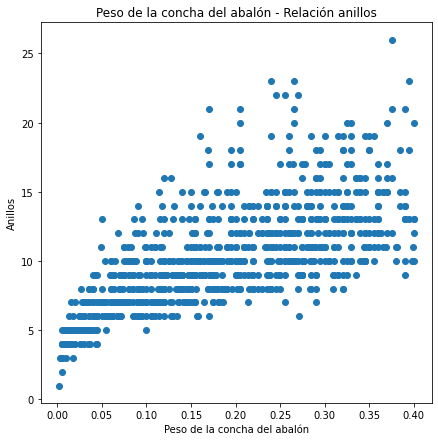

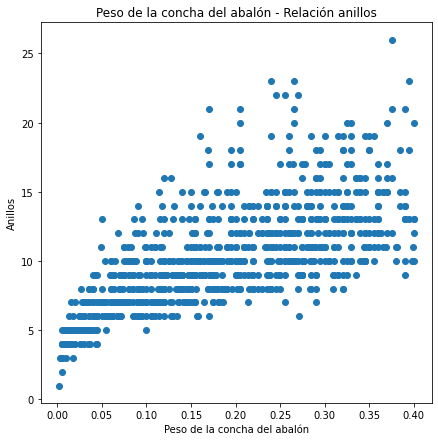

In [18]:
# distribución de los anillos con respecto al peso de la concha
# del abalón
    
plot_data(data,'Shellweight', 'Rings', 'Peso de la concha del abalón','Anillos',
          'Peso de la concha del abalón - Relación anillos')

# aprovechamos para realizar un pequeño corte

data = data[data.Shellweight <= 0.5]

plot_data(data,'Shellweight', 'Rings', 'Peso de la concha del abalón','Anillos',
          'Peso de la concha del abalón - Relación anillos')

# Ahora se ve un poco mejor

In [45]:
# Estadíticas de los datos

pd.set_option('display.float_format', lambda x: '%.2f' % x)

data.describe()

,Length,Diameter,Height,Whole,Viscera,Shellweight,Rings
count,987.00,987.00,987.00,987.00,987.00,987.00,987.00
mean,0.49,0.38,0.13,0.71,0.16,0.22,19.57
std,0.12,0.10,0.04,0.45,0.10,0.14,290.58
min,0.07,0.06,0.01,0.00,0.00,0.00,-1300.00
25%,0.41,0.32,0.10,0.35,0.07,0.10,8.00
50%,0.51,0.40,0.14,0.66,0.15,0.20,10.00
75%,0.58,0.46,0.16,1.00,0.22,0.30,13.00
max,0.74,0.60,0.24,2.83,0.54,1.00,9000.00


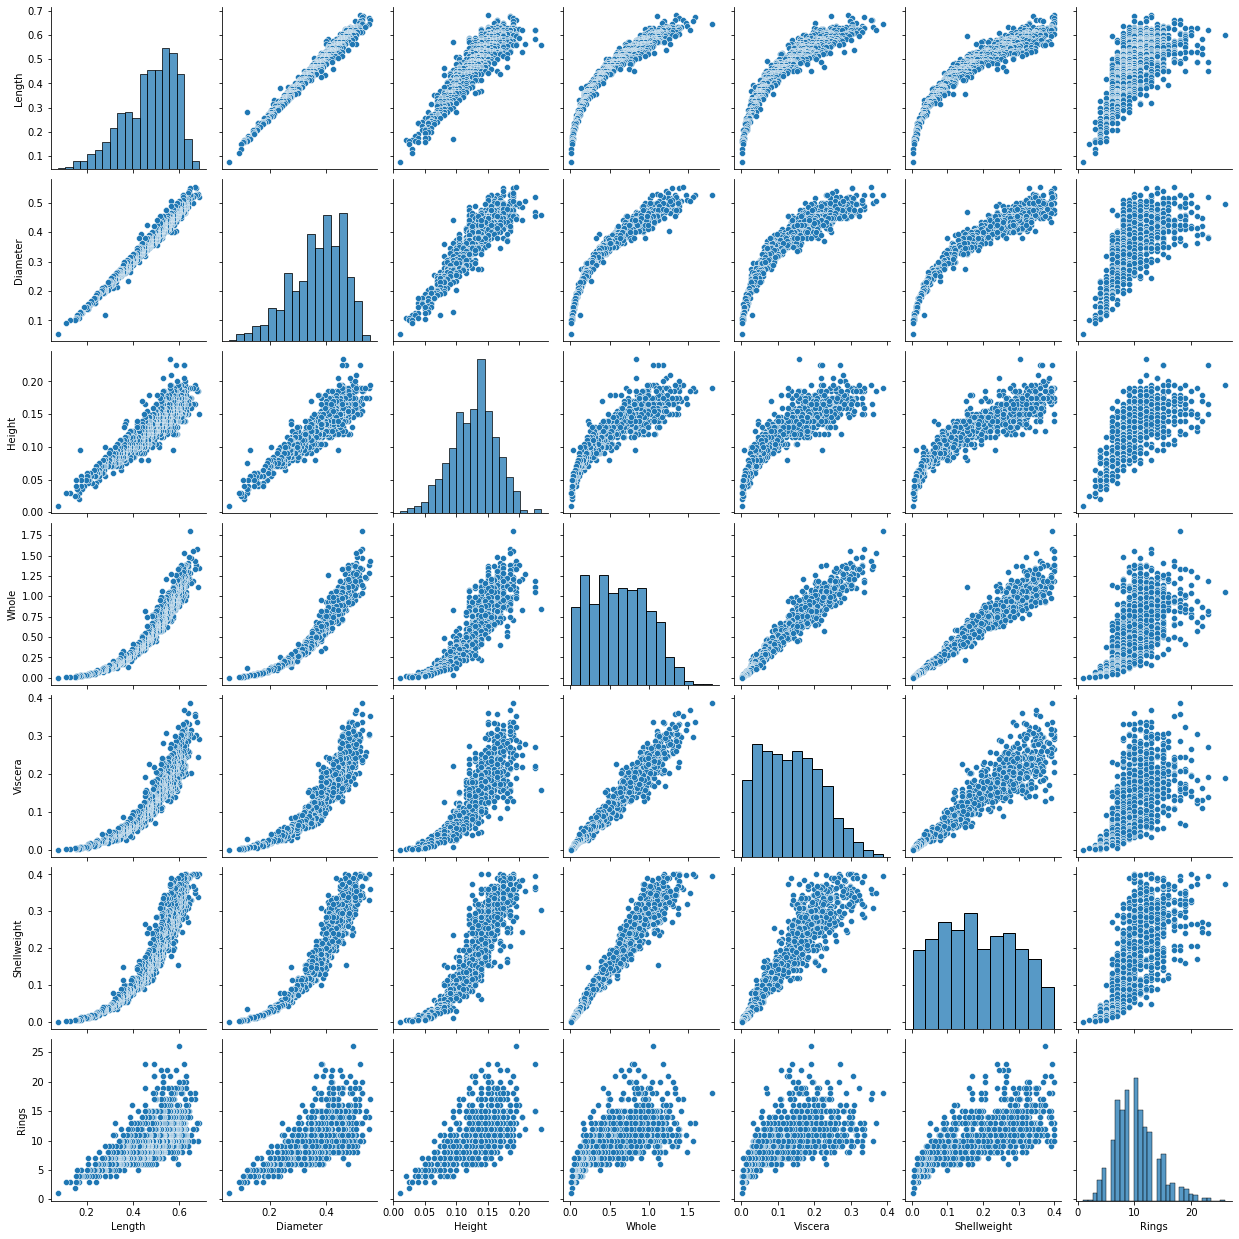

In [19]:
# La siguiente gráfica presenta relación entre pares de variables.

# En la diagonal se ven los histogramas de cada variables
# La segunda fila presenta la ultima fila presenta la relación de la variable Anillos
# con todas las demás

sns.pairplot(data)

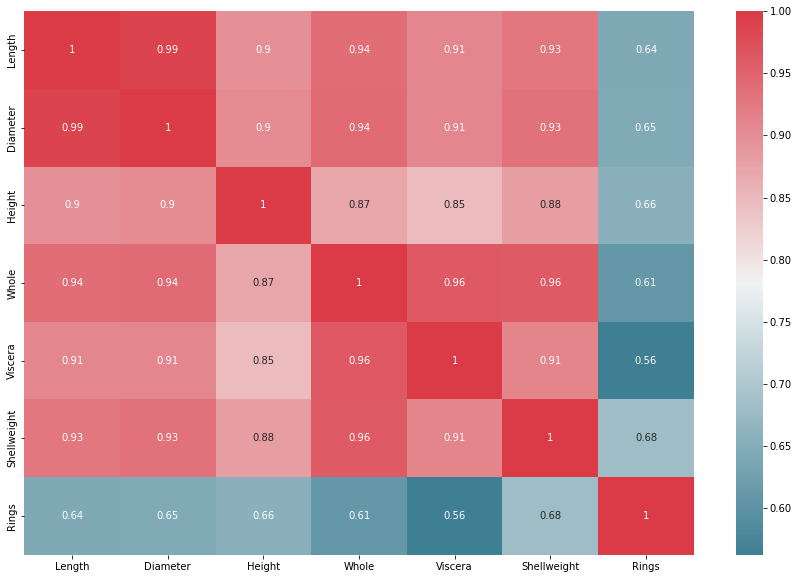

In [20]:
# Matriz de correlación de los datos

# A continuación se muestra la correlación de los datos por medio del mapa de calor

# Se puede observar que los datos están muy relacionados entre sí a excepción de 
# las relaciones con los anillos. 

def correlation_heatmap(df1):
    _,ax=plt.subplots(figsize=(15,10))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(data.corr(),annot=True,cmap=colormap)
    
correlation_heatmap(data)

# Note que en la mayoría los valores están altamente correlacionados
# En realidad la última columna/fila (tiene los mismos valores) 
# de esta matriz es la que más nos interesa, es la correlación 
# de todas las gráficas que vimos anteriormente. Note que las variables
# que tienen más correlación serán las que probablemente tengan 
# más peso en el modelo de predicción

### d) 
Defina el modelo utilizando un perceptrón multicapa implementado con PyTorch.

In [21]:
# Principales bibliotecas que utilizarán en el perceptrón
from numpy import vstack
from numpy import sqrt
from numpy import array
from pandas import read_csv, notnull
import numpy as np
import pandas as pd

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torch import Tensor
from torch.nn import Linear
from torch.nn import Sigmoid
from torch.nn import Module
from torch.optim import SGD
from torch.nn import MSELoss
from torch.nn.init import xavier_uniform_


El modelo corresponde al siguiente código

In [35]:
# utility functions

# dataset definition
class CSVDataset(Dataset):
    # load the dataset
    def __init__(self, path):
        """
        The __init__ function is run once when instantiating the Dataset object. 
        :param path: the path and name of the file to process. 
        """
        # load the csv file as a dataframe
        df = pd.read_csv(path)
        # store the inputs and outputs
        self.X = df.values[:, :-1].astype('float32')
        self.y = df.values[:, -1].astype('float32')
        # ensure target has the right shape
        self.y = self.y.reshape((len(self.y), 1))

    # number of rows in the dataset
    def __len__(self):
        """
        The __len__ function returns the number of samples in our dataset.
        """
        return len(self.X)

    # get a row at an index
    def __getitem__(self, idx):
        """
        The __getitem__ function loads and returns 
        a sample from the dataset at the given index idx. 
        :param idx: index.
        """
        return [self.X[idx], self.y[idx]]

    # get indexes for train and test rows
    def get_splits(self, n_test=0.33):
        """
        Split the dataset into training and test data.
        :param n_test: training data percentage
        """
        # determine sizes
        test_size = round(n_test * len(self.X))
        train_size = len(self.X) - test_size
        # calculate the split
        return random_split(self, [train_size, test_size])

    
def prepare_data(path):
    """
    Prepare the dataset.
    :param path: path and name of the file .
    """
    # load the dataset
    dataset = CSVDataset(path)
    # calculate split
    train, test = dataset.get_splits()
    # prepare data loaders
    train_dl = DataLoader(train, batch_size=32, shuffle=True)
    test_dl = DataLoader(test, batch_size=1024, shuffle=False)
    return train_dl, test_dl


def evaluate_model(test_dl, model):
    """
    Evaluates the model performance using Mean Squared Error (MSE).
    :param: test_dt: test data.
    :param: model: model to evaluate.
    """
    predictions, actuals = list(), list()
    for i, (inputs, targets) in enumerate(test_dl):
        # evaluate the model on the test set
        yhat = model(inputs)
        # retrieve numpy array
        yhat = yhat.detach().numpy()
        actual = targets.numpy()
        actual = actual.reshape((len(actual), 1))
        # store
        predictions.append(yhat)
        actuals.append(actual)
    predictions, actuals = vstack(predictions), vstack(actuals)
    # calculate mse
    mse = mean_squared_error(actuals, predictions)
    return mse


def predict(row, model):
    """
    Make a class prediction for one row of data
    """

    # convert row to data
    row = Tensor([row])
    # make prediction
    yhat = model(row)
    # retrieve numpy array
    yhat = yhat.detach().numpy()
    return yhat

In [30]:
# model definition
class MLP(Module):
    """
    Class that implements the perceptron, it extends the Module class.
    """
    # define model elements
    def __init__(self, n_inputs, n_output):
        super(MLP, self).__init__()
        # input to first hidden layer
        self.hidden1 = Linear(n_inputs, 4)
        # Values are scaled by the gain parameter using a uniform distribution.
        # No gradient will be recorded for this operation.
        xavier_uniform_(self.hidden1.weight)
        self.act1 = Sigmoid()
        # second hidden layer
        self.hidden2 = Linear(4, 2)
        xavier_uniform_(self.hidden2.weight)
        self.act2 = Sigmoid()
        # third hidden layer and output
        self.hidden3 = Linear(2, n_output)
        xavier_uniform_(self.hidden3.weight)

    def forward(self, X):
        """
        Forward run of the network using the data in X.
        """
        # input to first hidden layer
        X = self.hidden1(X)
        X = self.act1(X)
         # second hidden layer
        X = self.hidden2(X)
        X = self.act2(X)
        # third hidden layer and output
        X = self.hidden3(X)
        return X

### e)

Realice el entrenamiento del modelo.

In [31]:
def train_model(train_dl, model):
    """
    Train the model using the train data loader (train_dl).
    """
    
    # define the optimization
    # Mean Squared Error (MSE)
    criterion = MSELoss()
    # Stochastic gradient descent (SGD)
    optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9)
    # enumerate epochs
    for epoch in range(100):
        # enumerate mini batches
        for i, (inputs, targets) in enumerate(train_dl):
            # clear the gradients
            optimizer.zero_grad()
            # compute the model output
            yhat = model(inputs)
            # calculate loss
            loss = criterion(yhat, targets)
            # credit assignment
            loss.backward()
            # update model weights
            optimizer.step()

In [36]:
# prepare the data
path = 'datos/Abalone.csv'
train_dl, test_dl = prepare_data(path)
print(len(train_dl.dataset), len(test_dl.dataset))
print(train_dl)

# define the network
n_inputs = 6
n_output = 1
model = MLP( n_inputs, n_output)

# train the model
train_model(train_dl, model)

661 326


### f)

Calcule la pérdida usando el error cuadrático medio

In [94]:
# Evaluación del modelo usando el error cuadrático medio (MSE)
mse = evaluate_model(test_dl, model)
print('MSE: %.3f, RMSE: %.3f' % (mse, sqrt(mse)))

# Note que al correrlo se obtiene un error cuadrático medio bajo


MSE: 49.359, RMSE: 7.026


### g)

Prepare un modelo del ejemplo determinado y explique los resultados

In [38]:
# Realizamos una predicción con el modelo con la primera
#  fila de datos del documento del Abalón, cuyo valor
#  esperado corresponde a 17 anillos
row = [0.745,0.585,0.215,2.499,0.472,0.7]
yhat = predict(row, model)
print('Predicción del modelo: %.3f' % yhat)
print('Valor obtenido de los datos: 17')



Predicción del modelo: 16.571
Valor obtenido de los datos: 17


Note que según los resultados, el modelo se acerca bastante a lo esperado. El resultado no es igual pero cercano incluso hasta redodeado al entero más cercano se obtiene lo deseado. Gracias a este modelo se podrían obtener otros datos de abalón y a partir de estos conseguir la cantidad de anillos sin necesidad del experimento.

### h)

Realice 3 conclusiones sobre el ejercicio

- Los perceptrones multicapa permiten pasar los datos por varios niveles de regresión y así mejorar la precisión del modelo.
- Los modelos de perceptrón multicapa se pueden adaptar a cualquier caso de conjutno de datos que tengan una dependencia entre sí, a pesar de que la dependencia no es trivial el modelo logra encontrar una rápidamente.
- Gracias a la utilización de este modelo se obteiene una forma sencilla de obtener la edad de Abalón con base en datos datos mucho más sencillos de medir, esta facilidad acelera considerablemente el análisis de los próximos Abalones.

## Pregunta 4. Ajuste de curvas con mínimos cuadrados.
(requisito indispensable para tomar en cuenta el ejercicio, deben usar tensores de PyTorch).
- a) (5 puntos) Calcule el $w_{opt}$ (el w óptimo) para los datos de los abulones. 
- b) (5 puntos) Implemente la función forward, la cual estima las salidas del modelo al hacer  $f(x) =X\,\vec{w}_{opt}$ donde la función f(x) se refiere a la función de activación, con X la matriz de características.
- c) (5 puntos) Calcule la pérdida utilizando el error cuadrático medio.
- d) (3 puntos) Realice al menos tres conclusiones sobre el ejercicio.

### a)
Calcule el $w_{opt}$ (el w óptimo) para los datos de los abulones. 

In [90]:
# Se estima el W óptimo con mínimos cuadrados
 
def estimateOptimumW(targetsAll, SamplesAll):
    """ 
    Estimate the optimum W with least squares
    param TargetsAll, target
    param SamplesAll, NumSamples 
    return 
       wOpt, array with optimum weights
    """
    # Calculate w = Apinverse*Targets
    samplesAllPinv = torch.tensor(np.linalg.pinv(SamplesAll))
    samplesAllPinv = samplesAllPinv.to(torch.float32)
    targetsAll = targetsAll.to(torch.float32)
    wOpt = samplesAllPinv.mm(targetsAll)
    return wOpt
 
# La informaición se convierte en arrays de numpy
# para después pasarlos a tensores de Pytorch
SamplesAll = torch.tensor(data.iloc[:,[0,1,2,3,4,5]].to_numpy())
targetsAll = torch.tensor(data.iloc[:,[6]].to_numpy())

# The targets are adjusted to be able to computet he multiplication. 
targetsAll=targetsAll.reshape([targetsAll.shape[0],1])

# Se calcula el w óptimo
wOpt = estimateOptimumW( targetsAll, SamplesAll)

print("El valor optimo: ", wOpt)


Size of samplesAllînv: torch.Size([6, 889])
Size of targetsAll:  torch.Size([889, 1])
type1:  torch.float64
type1:  torch.float32
type2:  torch.float32
El valor optimo:  tensor([[13.4563],
        [-0.6391],
        [30.1076],
        [-6.7547],
        [-9.6091],
        [31.4392]])


### b)
Implemente la función forward, la cual estima las salidas del modelo al hacer  $f(x) =X\,\vec{w}_{opt}$ donde la función f(x) se refiere a la función de activación, con X la matriz de características.

In [97]:
def forward(SamplesAll, wOpt):
    """
    Get model output
    param: SamplesAll, a matrix with dimensions NumSamples x NumDimensions 
    return: Estimates the model outputs activation function 
    """
    SamplesAll = SamplesAll.to(torch.float32)
    wOpt = wOpt.to(torch.float32)
    
    EstimatedTargets = SamplesAll.mm(wOpt)
    
    return EstimatedTargets

# Estimated target for sample data    
estimatedTargetsAll = forward(SamplesAll, wOpt)


### c)
Calcule la pérdida utilizando el error cuadrático medio.

In [100]:
# 4) Se evalúa el error
def evaluateError(TargetsAll, EstimatedTargetsAll):
    """
    Evaluate model error using the euclidian distance.
    param TargetsAll, real targets
    param EstimatedTargets
    """
    error = torch.norm(TargetsAll - EstimatedTargetsAll, 2)
    return error
  
  
# Error for sample data  
mse = evaluateError(targetsAll, estimatedTargetsAll)
print('MSE: %.3f, RMSE: %.3f' % (mse, sqrt(mse)))

MSE: 77.202, RMSE: 8.786


### d)

Realice al menos tres conclusiones sobre el ejercicio.

- El error cuadrático medio de una aproximación por medio de perceptrones es por lo general menos que la aproximación por medio de perceptrones multicapa ya que se pasa por menos análisis.
- A pesar de tener un error cuadrático medio mayor note que la diferencia con respecto a las aproximaciones del ejercicio anterior no son tan lejanas, por lo que en la ausencia de recursos se podría usar esata aproximación sin problemas.
- El ajuste a la ecuación de mejor ajuste para los abalones permite obtener de forma lineal una forma de predecir el comportamiento de la cantidad de anillos que poseeera el abalon y por lo tanto facilita la investigación al hacerla mucho más rápido con predicciones confiables. 